# Question 1

## Question 1 Part 1

In [163]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns 
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression as LR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import accuracy_score
from warnings import simplefilter
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn import tree
from sklearn import datasets
import random
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import pairwise_distances
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import DBSCAN
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [164]:
columns = ['variance of Wavelet Transformed image','skewness of Wavelet Transformed image','curtosis of Wavelet Transformed image','entropy of image','class']
df = pd.read_csv('/content/data_banknote_authentication.csv', names = columns, header = None)

In [165]:
df

,variance of Wavelet Transformed image,skewness of Wavelet Transformed image,curtosis of Wavelet Transformed image,entropy of image,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [166]:
print(df.isna().sum())

variance of Wavelet Transformed image    0
skewness of Wavelet Transformed image    0
curtosis of Wavelet Transformed image    0
entropy of image                         0
class                                    0
dtype: int64


In [167]:
print(df.isnull().sum())

variance of Wavelet Transformed image    0
skewness of Wavelet Transformed image    0
curtosis of Wavelet Transformed image    0
entropy of image                         0
class                                    0
dtype: int64


In [168]:
df.describe()

,variance of Wavelet Transformed image,skewness of Wavelet Transformed image,curtosis of Wavelet Transformed image,entropy of image,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [169]:
X = df.drop(['class'],axis = 'columns')
ss = StandardScaler()
X_trans = ss.fit_transform(X)

In [170]:
print(X_trans)

[[ 1.12180565  1.14945512 -0.97597007  0.35456135]
 [ 1.44706568  1.06445293 -0.89503626 -0.12876744]
 [ 1.20780971 -0.77735215  0.12221838  0.61807317]
 ...
 [-1.47235682 -2.62164576  3.75901744 -0.75488418]
 [-1.40669251 -1.75647104  2.552043   -0.04315848]
 [-1.04712236 -0.43982168  0.29861555  1.1364645 ]]


In [171]:
Y = df['class'].astype(int)
print(Y.value_counts())

0    762
1    610
Name: class, dtype: int64


In [172]:
X_train, X_test, y_train, y_test = tts(X_trans, Y, test_size=0.3, shuffle = True,stratify = Y)
X_val, X_test, y_val, y_test = tts(X_test, y_test, test_size=0.67, shuffle = True,stratify = y_test)

## Question 1 part 2

In [173]:
C_vals = [0.125,0.25,0.5,1,2,4]
for val in C_vals:
    model = SVC(C = val)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    print("Accuracy for C =", val, "is",  acc*100,'%')

Accuracy for C = 0.125 is 99.27797833935018 %
Accuracy for C = 0.25 is 99.63898916967509 %
Accuracy for C = 0.5 is 99.63898916967509 %
Accuracy for C = 1 is 100.0 %
Accuracy for C = 2 is 100.0 %
Accuracy for C = 4 is 100.0 %


<Axes: >

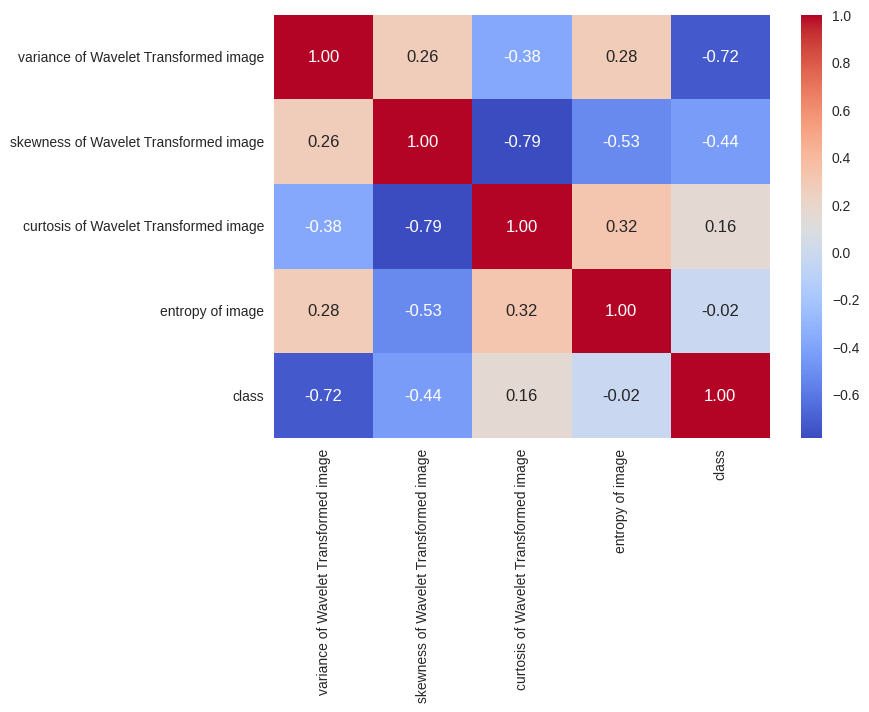

In [174]:
corr_bank = df.corr() 
sns.heatmap(corr_bank, cmap='coolwarm', annot=True, fmt=".2f")

Accuracy for C = 0.125 is 93.14079422382672 %
Accuracy for C = 0.25 is 92.7797833935018 %
Accuracy for C = 0.5 is 92.7797833935018 %
Accuracy for C = 1 is 94.22382671480143 %
Accuracy for C = 2 is 93.86281588447653 %
Accuracy for C = 4 is 93.86281588447653 %


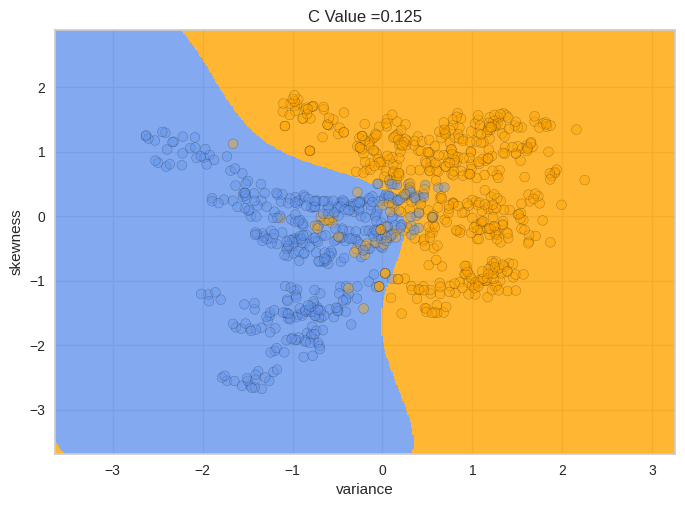

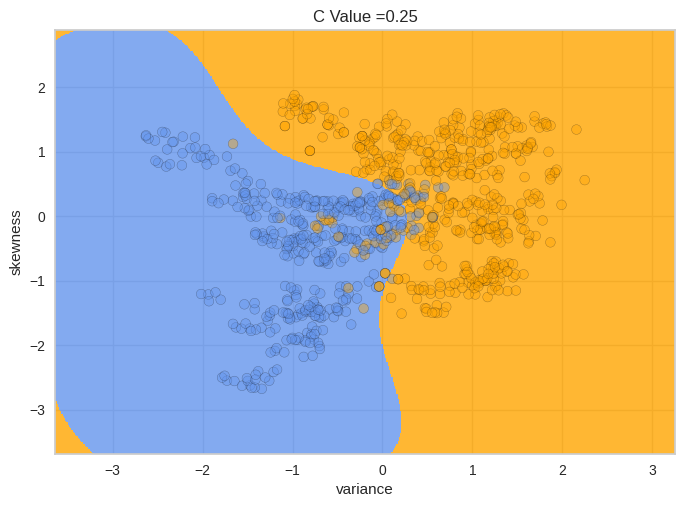

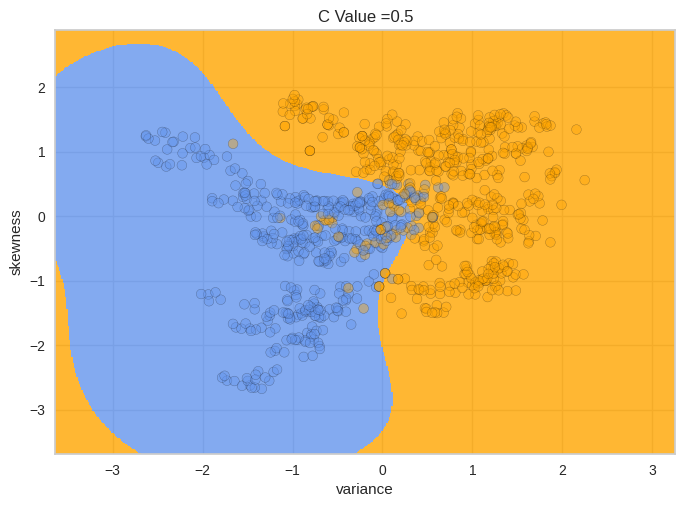

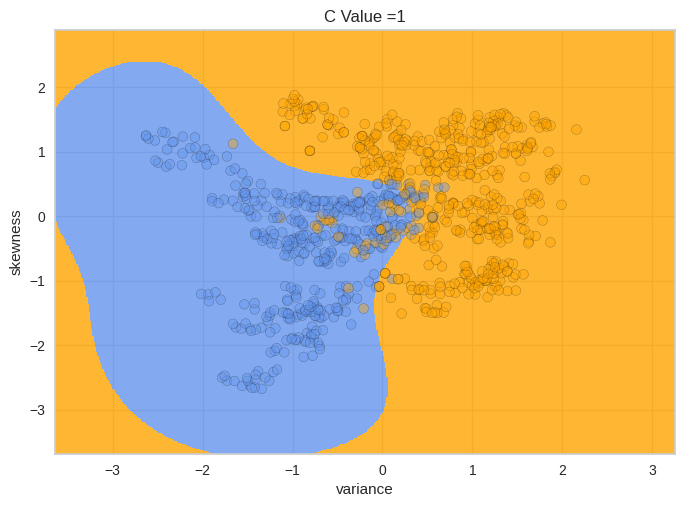

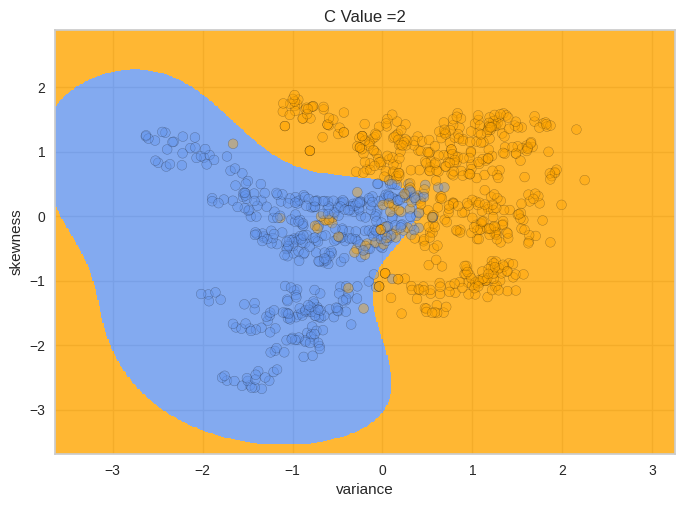

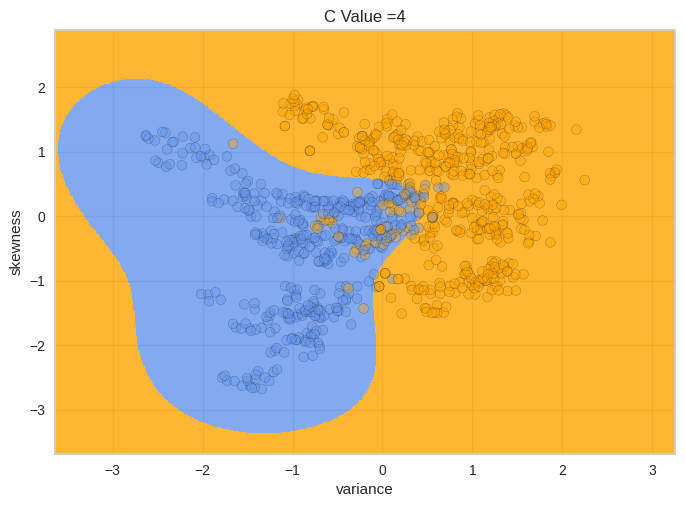

In [175]:
C_vals = [0.125,0.25,0.5,1,2,4]
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "darkblue"]
for val in C_vals:
    model = SVC(C = val)
    model.fit(X_train[:,:2],y_train)
    y_pred = model.predict(X_test[:,:2])
    acc = accuracy_score(y_test,y_pred)
    print("Accuracy for C =", val, "is", acc*100,'%')
    disp = DecisionBoundaryDisplay.from_estimator(model, X_train[:,:2],cmap = cmap_light, response_method="predict",xlabel='variance',alpha = 0.8, ylabel='skewness',plot_method = 'pcolormesh',grid_resolution = 500)
    plt.title('C Value =' + str(val))
    disp.ax_.scatter(X_train[:, 0], X_train[:, 1],cmap = cmap_light, c=y_train,edgecolor="k",alpha = 0.4)

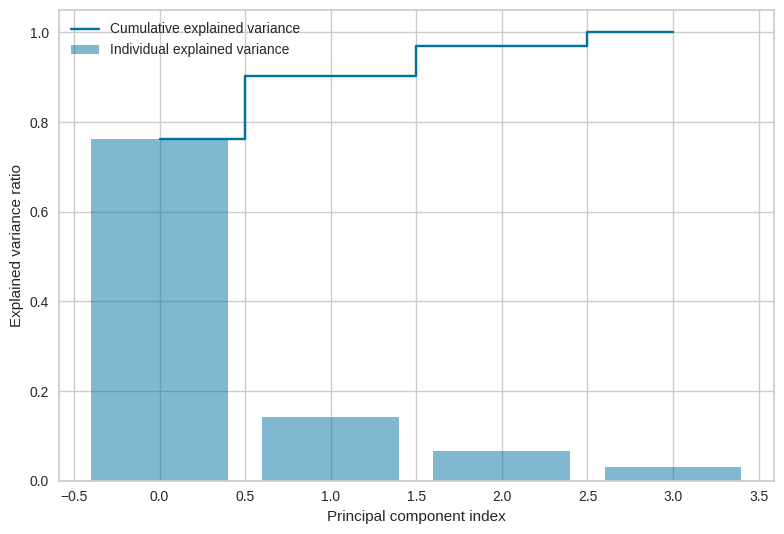

In [176]:
gg = PCA()
X_trans_pc = gg.fit_transform(X)
exp_var_pca = gg.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [177]:
gg = PCA(n_components = 2)
X_trans_pc = gg.fit_transform(X)

In [178]:
X_train, X_test, y_train, y_test = tts(X_trans_pc, Y, test_size=0.3, shuffle = True,stratify = Y)
X_val, X_test, y_val, y_test = tts(X_test, y_test, test_size=0.67, shuffle = True,stratify = y_test)

Accuracy for C = 0.125 is 80.86642599277978 %
Accuracy for C = 0.25 is 81.94945848375451 %
Accuracy for C = 0.5 is 81.2274368231047 %
Accuracy for C = 1 is 80.50541516245488 %
Accuracy for C = 2 is 80.50541516245488 %
Accuracy for C = 4 is 80.14440433212997 %


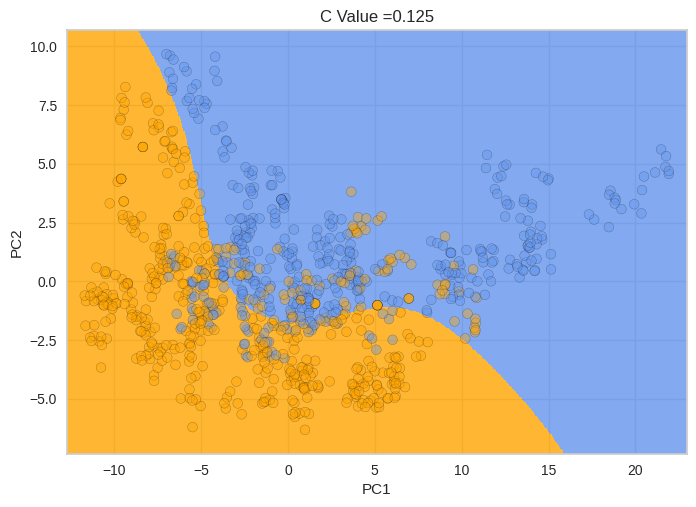

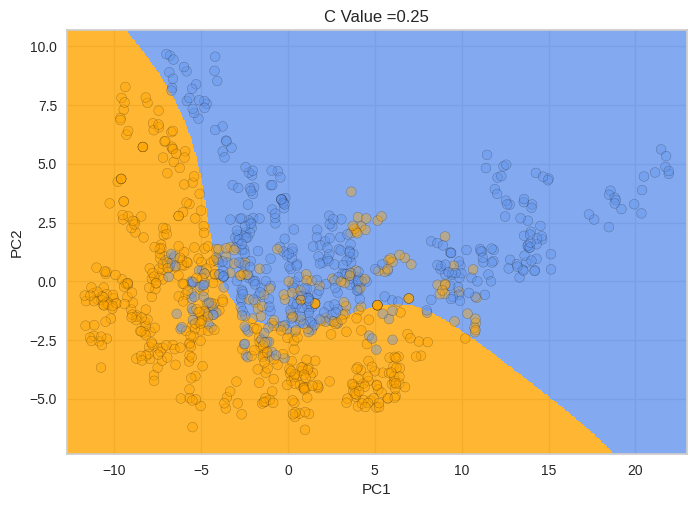

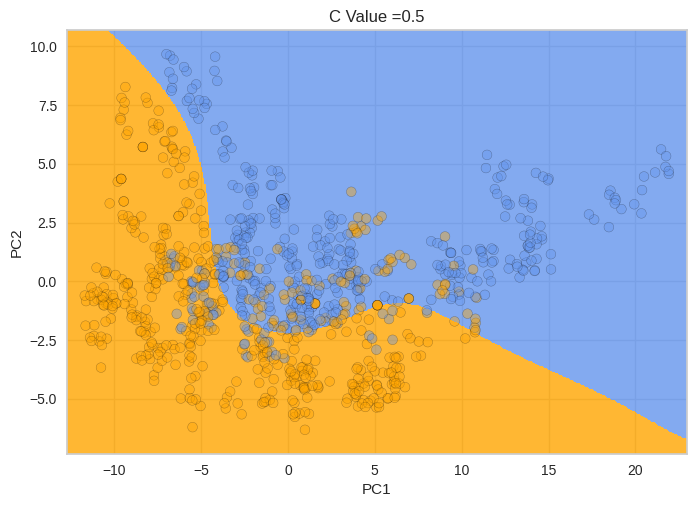

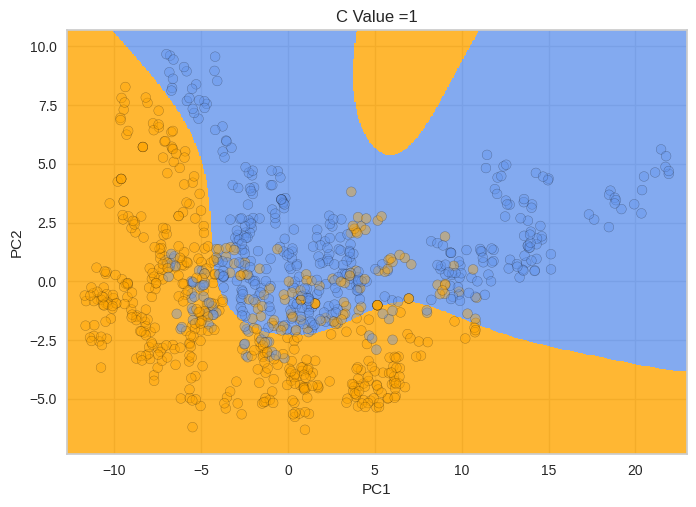

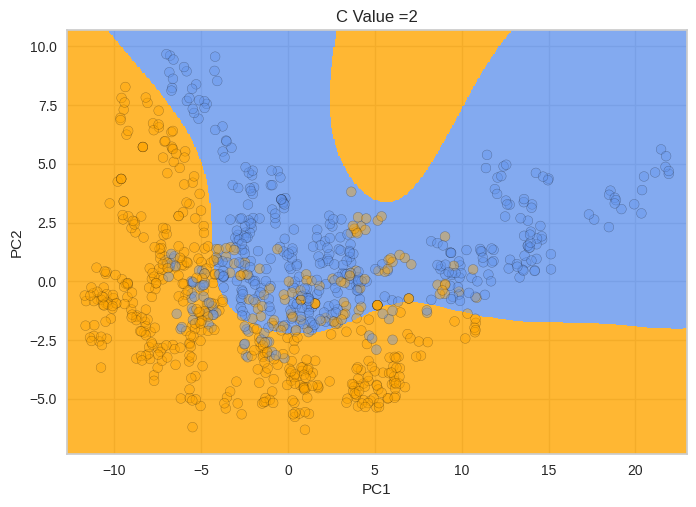

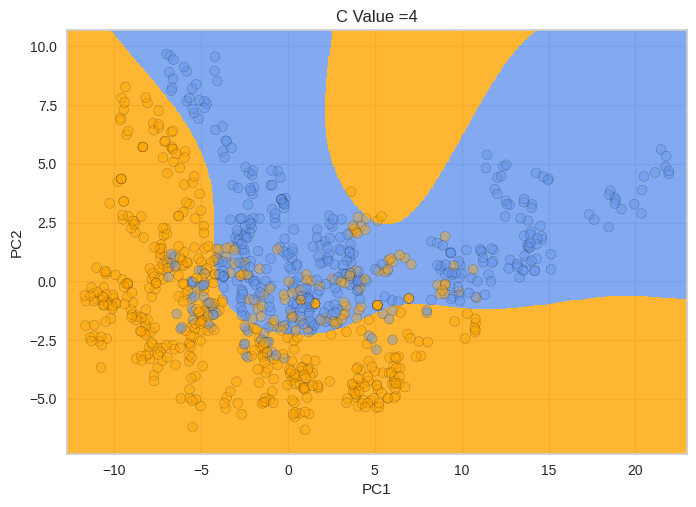

In [179]:
C_vals = [0.125,0.25,0.5,1,2,4]
for val in C_vals:
    model = SVC(C = val)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    print("Accuracy for C =", val, "is",  acc*100,'%')
    disp = DecisionBoundaryDisplay.from_estimator(model, X_train,cmap = cmap_light, response_method="predict",xlabel='PC1',alpha = 0.8, ylabel='PC2',plot_method = 'pcolormesh',grid_resolution = 500)
    plt.title('C Value =' + str(val))
    disp.ax_.scatter(X_train[:, 0], X_train[:, 1],cmap = cmap_light, c=y_train,edgecolor="k",alpha = 0.4)

## Question 1 Part 3

Accuracy for function = linear is 75.09025270758123 %
Accuracy for function = poly is 72.56317689530685 %
Accuracy for function = rbf is 80.50541516245488 %


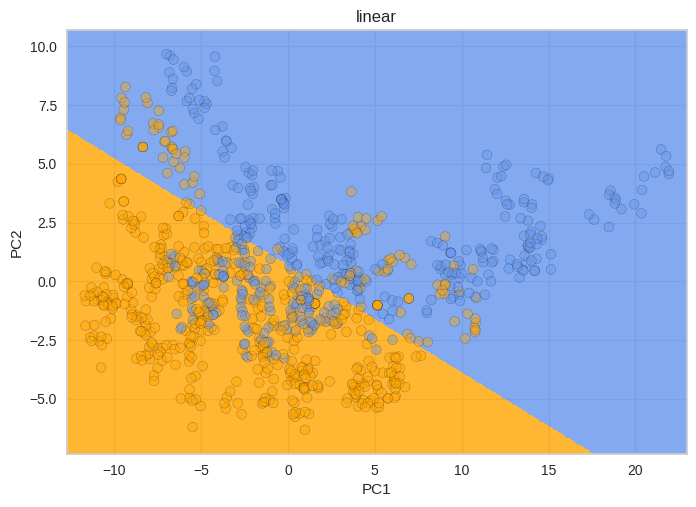

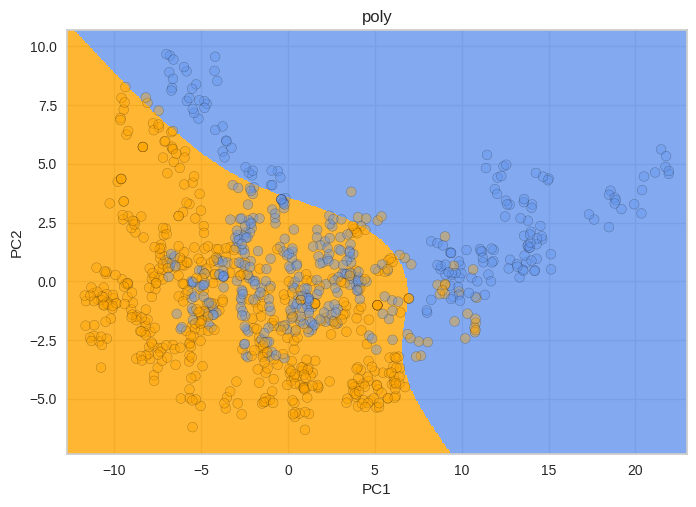

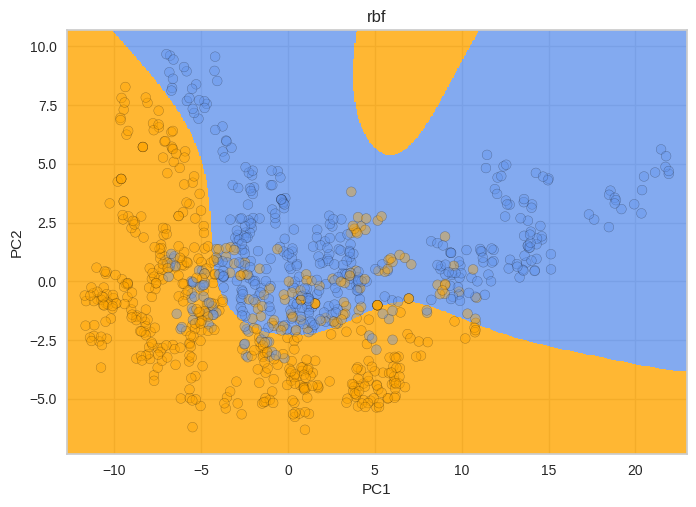

In [180]:
funcs = ['linear', 'poly', 'rbf']
for function in funcs:
    model = SVC(kernel = function)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    print("Accuracy for function =", function, "is", acc*100,'%')
    disp = DecisionBoundaryDisplay.from_estimator(model, X_train,cmap = cmap_light, response_method="predict",xlabel='PC1',alpha = 0.8, ylabel='PC2',plot_method = 'pcolormesh',grid_resolution = 500)
    plt.title(function)
    disp.ax_.scatter(X_train[:, 0], X_train[:, 1],cmap = cmap_light, c=y_train,edgecolor="k",alpha = 0.4)

In [181]:
X_train, X_test, y_train, y_test = tts(X_trans, Y, test_size=0.3, shuffle = True,stratify = Y)
X_val, X_test, y_val, y_test = tts(X_test, y_test, test_size=0.67, shuffle = True,stratify = y_test)

In [182]:
funcs = ['linear', 'poly', 'rbf']
for function in funcs:
    model = SVC(kernel = function)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    print("Accuracy for function =", function, "is", acc*100,'%')

Accuracy for function = linear is 99.63898916967509 %
Accuracy for function = poly is 100.0 %
Accuracy for function = rbf is 100.0 %


Accuracy for C = 4 is 85.1985559566787 %
Accuracy for C = 4 is 81.58844765342961 %
Accuracy for C = 4 is 89.53068592057761 %


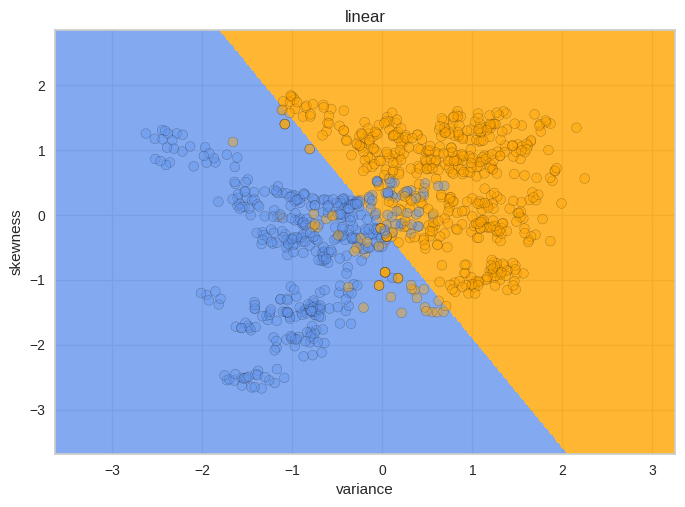

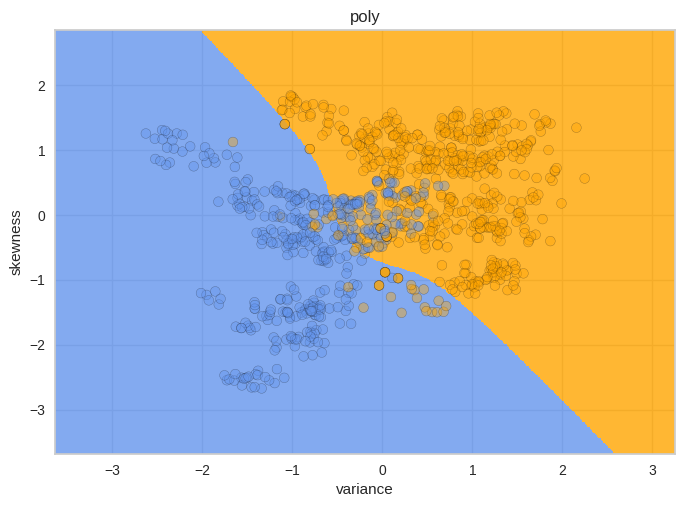

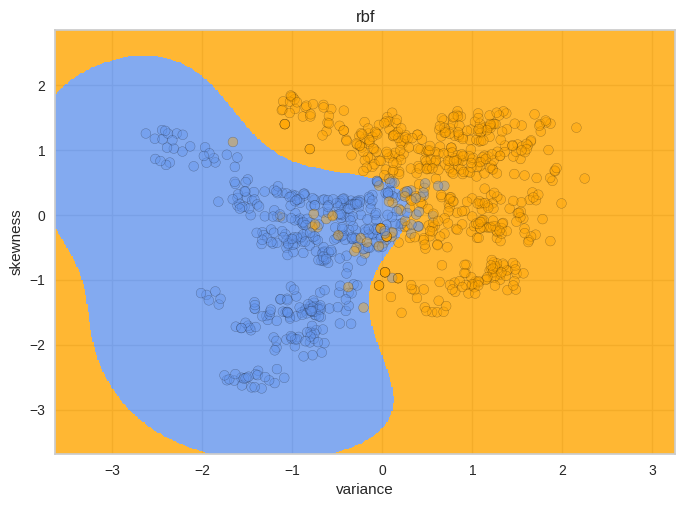

In [183]:
funcs = ['linear', 'poly', 'rbf']
for function in funcs:
    model = SVC(kernel = function)
    model.fit(X_train[:,:2],y_train)
    y_pred = model.predict(X_test[:,:2])
    acc = accuracy_score(y_test,y_pred)
    print("Accuracy for C =", val, "is", acc*100,'%')
    disp = DecisionBoundaryDisplay.from_estimator(model, X_train[:,:2],cmap = cmap_light, response_method="predict",xlabel='variance',alpha = 0.8, ylabel='skewness',plot_method = 'pcolormesh',grid_resolution = 500)
    plt.title(function)
    disp.ax_.scatter(X_train[:, 0], X_train[:, 1],cmap = cmap_light, c=y_train,edgecolor="k",alpha = 0.4)

## Question 1 part 4

View in Report